In [1]:
import qiskit
import numpy as np
import sys
sys.path.insert(1,'../')

from vqa.circuits import *
from vqa.vqm import *
from vqa.bounds import sld_qfim, cfim, sld_bound, cls_bound
from vqa.fitting import *
from vqa.entanglement import concentratable_entanglement

/Users/anhkhoi/Documents/PhysRes/Quantum_Metrology/Full_code/vmetro/run/../vqa/circuits.py:292: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if values[i] == 'random':


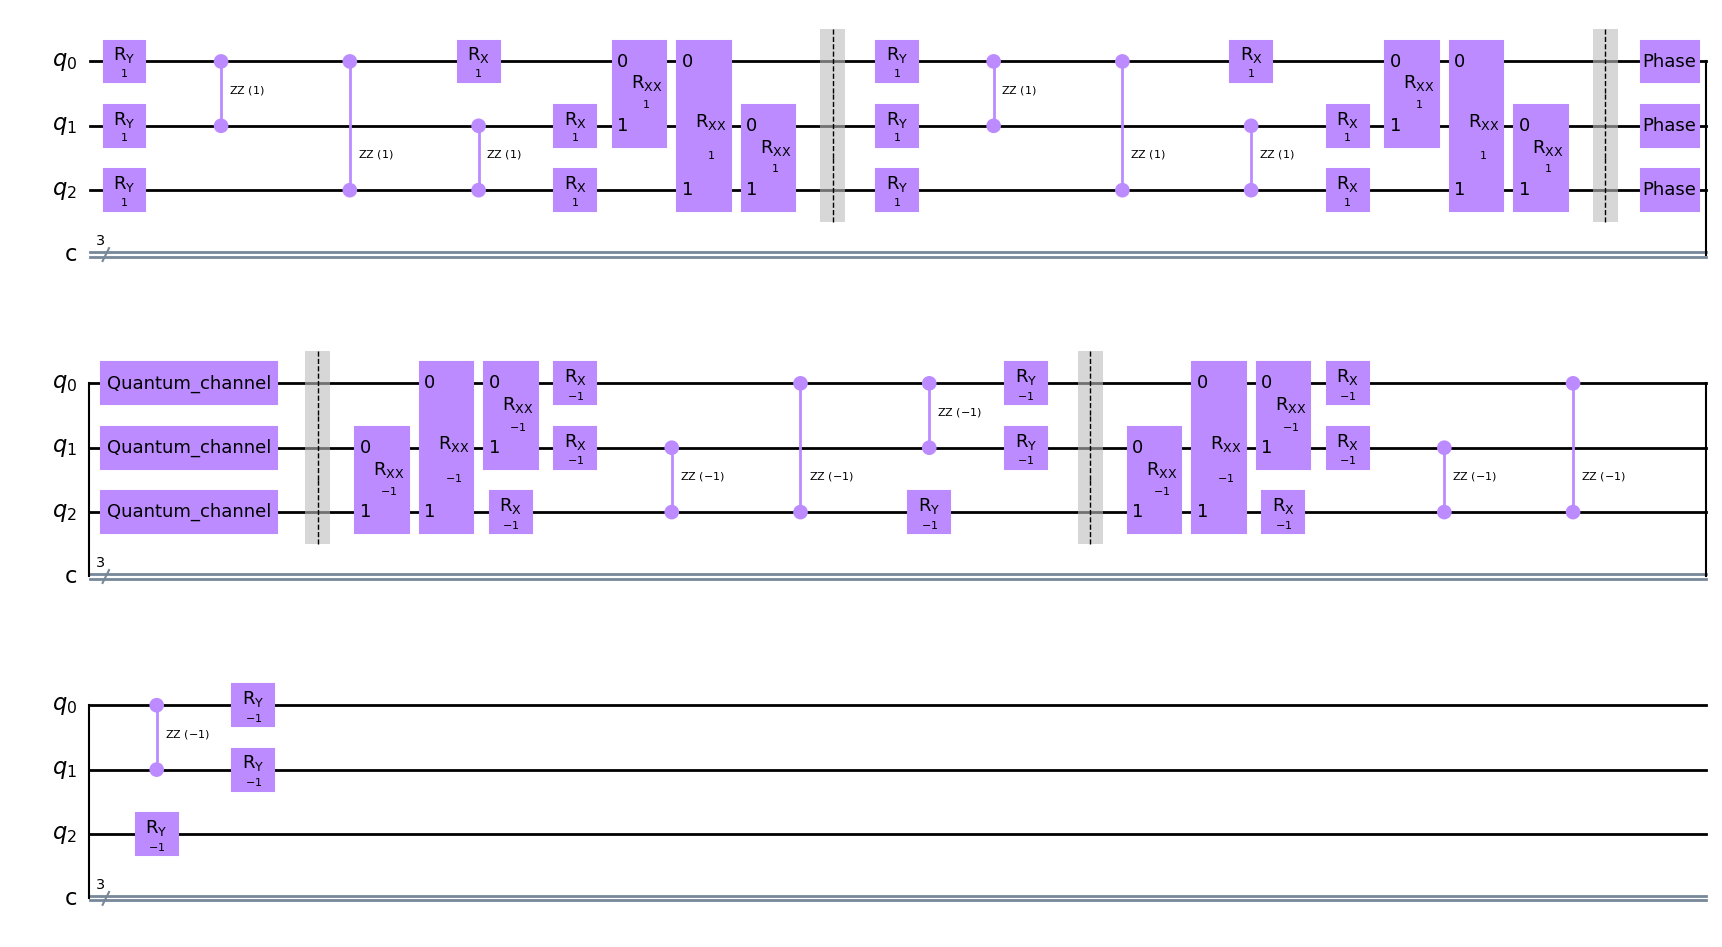

In [2]:
num_qubits = 3
t = 1.0

cirs =[squeezing_ansatz, u_phase, dephasing, squeezing_ansatz_inv]
coefs = [2,t,t,2] #num_players, time, 
phases = np.array([np.pi/6., np.pi/6., np.pi/6.])

lamb = 0.1
y = vqa.constants.lamb2y(t,lamb) #fdephasing
params = create_params(cirs,coefs,num_qubits,[[1],phases,[y],[1]])

# setup a model 
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
model = qc_add(qc, cirs, coefs, params)
model.draw('mpl')

0 0.9657965817883138
1 0.9263514505441881
2 0.8765474085428254
3 0.8236215710380427
4 0.7686847471970408
5 0.711925060670545
6 0.6545467301293091
7 0.5937546664143392
8 0.5318494747232105
9 0.47361241188129843
10 0.4235531590605456
11 0.3787334296202134
12 0.3465044410601178
13 0.3281600940087569
14 0.3191503698977163
15 0.31121170477311744
16 0.3157137865192533
17 0.3116775065058288
18 0.31650256532580956
19 0.3121617116408423
20 0.317317820367903
21 0.3126589298880629
22 0.31815254459695774
23 0.3131650869755438
24 0.3190015230847566
25 0.31367712799563363
26 0.3198609055101159
27 0.3141927884680149
28 0.3207278779222388
29 0.31471040909749703
30 0.32160040530650147
31 0.31522878753884975
32 0.32247703052726306
33 0.31574706097632477
34 0.32335671942838096
35 0.31626461590077026
36 0.32423874343065706
37 0.3167810196913513
38 0.3251225921914054
39 0.317295969712155
40 0.32600790939746316
41 0.3178092561672152
42 0.32689444643699717
43 0.3183207350028934
44 0.32778202924742017
45 0.31

(0.0, 100.0)

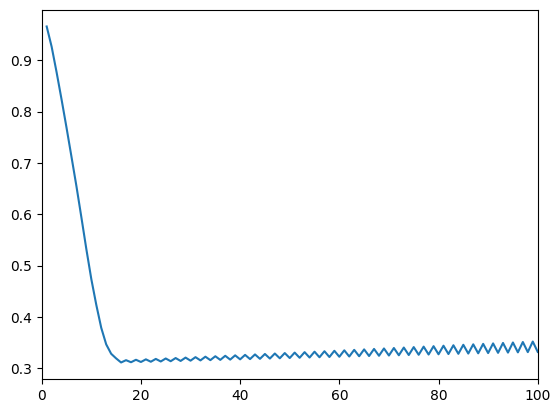

In [3]:
# training sld bound
# allways remember reset qc

import matplotlib.pyplot as plt
num_steps = 100

params, costs = training(qc,
               cirs,
               coefs,  
               params,
               which_train = [0,-1],
               cost_func = bound_sld_cls,
               grad_func = grad_cost,
               opt_func = adam,
               num_steps = num_steps)

# plot
iterations = list(range(1, num_steps+1))
plt.plot(iterations, np.real(costs), '-')
plt.xlim(0, num_steps)

In [4]:
np.savetxt("../experiments/squeezing_ansatz/" + str(num_qubits) + "/dephasing/costs_01.csv", costs, delimiter=",")
np.savetxt("../experiments/squeezing_ansatz/" + str(num_qubits) + "/dephasing/params_01.csv", np.concatenate((params[0],params[-1]), axis=None), delimiter=",")

FileNotFoundError: [Errno 2] No such file or directory: '../experiments/squeezing_ansatz/3/dephasing/costs_01.csv'

In [ ]:
# quantum fisher information matrix

qc = qiskit.QuantumCircuit(num_qubits,num_qubits)
qfim = sld_qfim(qc,cirs,coefs,params)
#print(qfim)

# cfim
cfim = vqa.bounds.cfim(qc,cirs,coefs,params)
#print(cfim)



# cls bound and quantum bound
cb = cls_bound(qc,cirs,coefs,params)
qd = sld_bound(qc, cirs, coefs, params)

inv_cfim = inv(cfim + np.eye(len(cfim)) * 10e-10)
inv_qfim = inv(qfim + np.eye(len(qfim)) * 10e-10)

# calcualte concentratable_entanglement
qc1 = star_ansatz(qc.copy(), coefs[0], params[0])
ce = vqa.entanglement.concentratable_entanglement(qc1)

print(cb, qd, np.trace(cfim @ inv_qfim),ce)